In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://drive.google.com/uc?id=1ZEwYPkIxWsjfhDzYKXk_IHoGJ2CnoRms'
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

# Provide descriptive statistics
print(df.describe())

# Identify and handle missing values
print(df.isnull().sum())  # Check for missing values
df.fillna(method='ffill', inplace=True)  # You can choose a method that fits your dataset context

# Check for duplicates
print("Duplicate entries: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)  # Remove duplicates

# Display the cleaned DataFrame
print(df.head())


   Unnamed: 0       review_id  product_id  \
0           0   RUE030N50F9EJ  B09PYVXXW5   
1           1  R385JSD6KWP2QU  B09PYVXXW5   
2           2  R1UB1V4EPP9MN3  B09PYVXXW5   
3           3   RWYK1GXIVV6H1  B09PYVXXW5   
4           4  R3FBQBGQM3II4W  B09PYVXXW5   

                                               title    author  rating  \
0  5.0 out of 5 stars Really good with a couple o...       CTM       5   
1  4.0 out of 5 stars I wish I could rate 5 stars...    Gianna       4   
2  5.0 out of 5 stars Basically perfect, fantasti...  Colin M.       5   
3            1.0 out of 5 stars Decent but Defective    Aquila       1   
4   3.0 out of 5 stars I went with soundcore instead   Frankie       3   

                                             content  \
0  I love TWS earbuds. I have many including buds...   
1  …I just can’t. Because as useful as these earb...   
2  I needed a replacement for my Galaxy buds pro'...   
3  UPDATE 6/24/22: As of 6/23/22, my replacement ...   
4  S

<ipython-input-2-7605e17053d4>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # You can choose a method that fits your dataset context


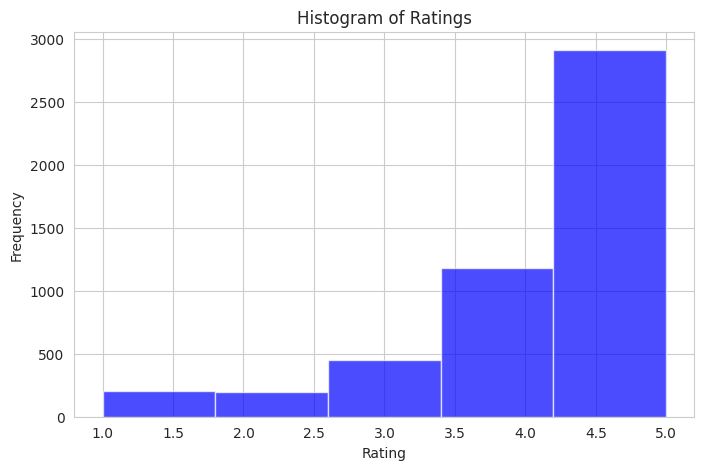

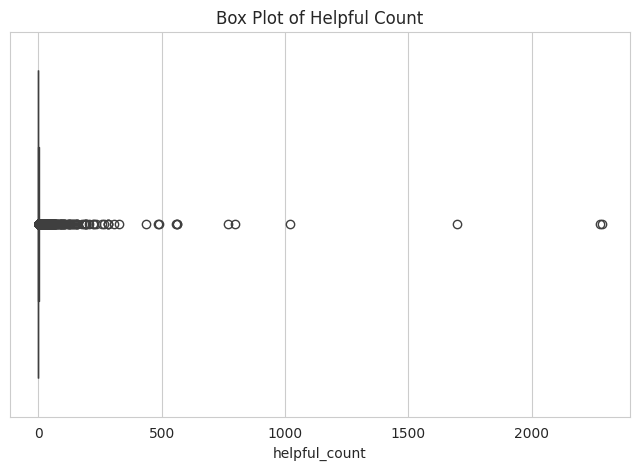

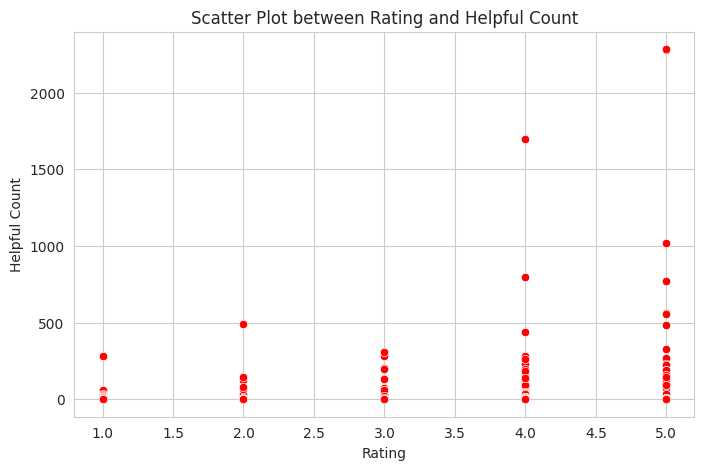

In [3]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of the 'rating'
plt.figure(figsize=(8, 5))
plt.hist(df['rating'], bins=5, color='blue', alpha=0.7)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Box Plot for 'helpful_count' to observe outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['helpful_count'])
plt.title('Box Plot of Helpful Count')
plt.show()

# Scatter Plot to visualize relationship between 'rating' and 'helpful_count'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rating', y='helpful_count', data=df, color='red')
plt.title('Scatter Plot between Rating and Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()


<Figure size 1000x1000 with 0 Axes>

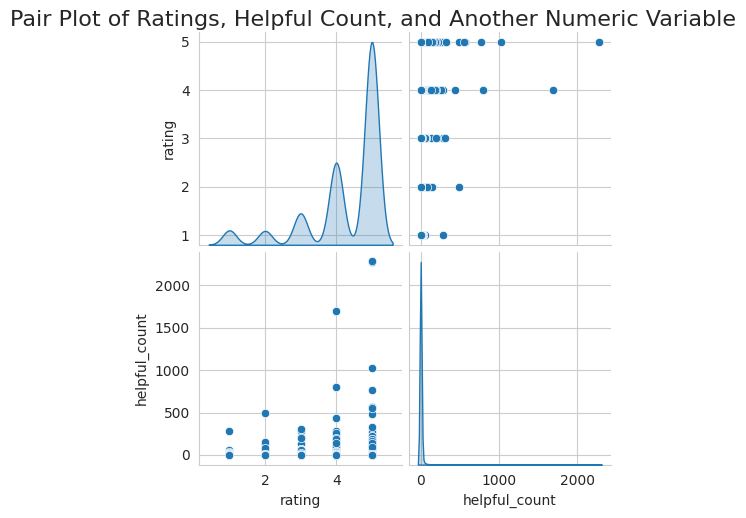

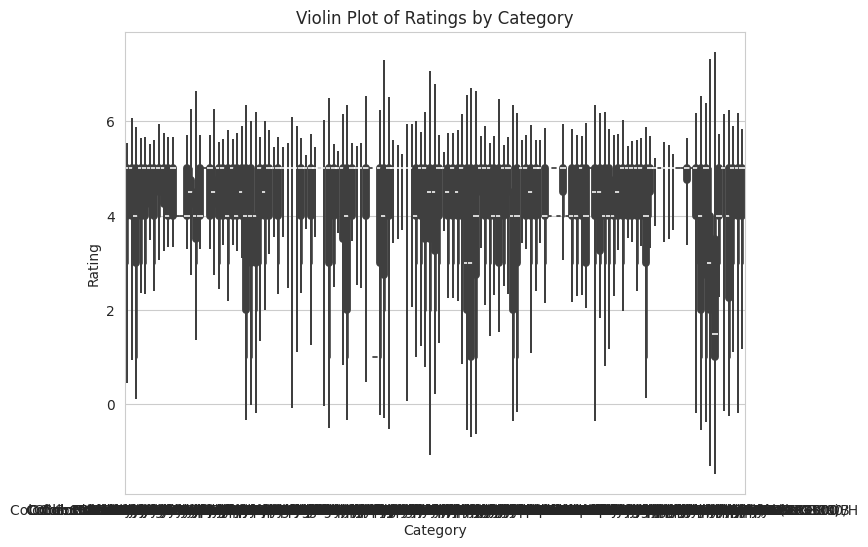

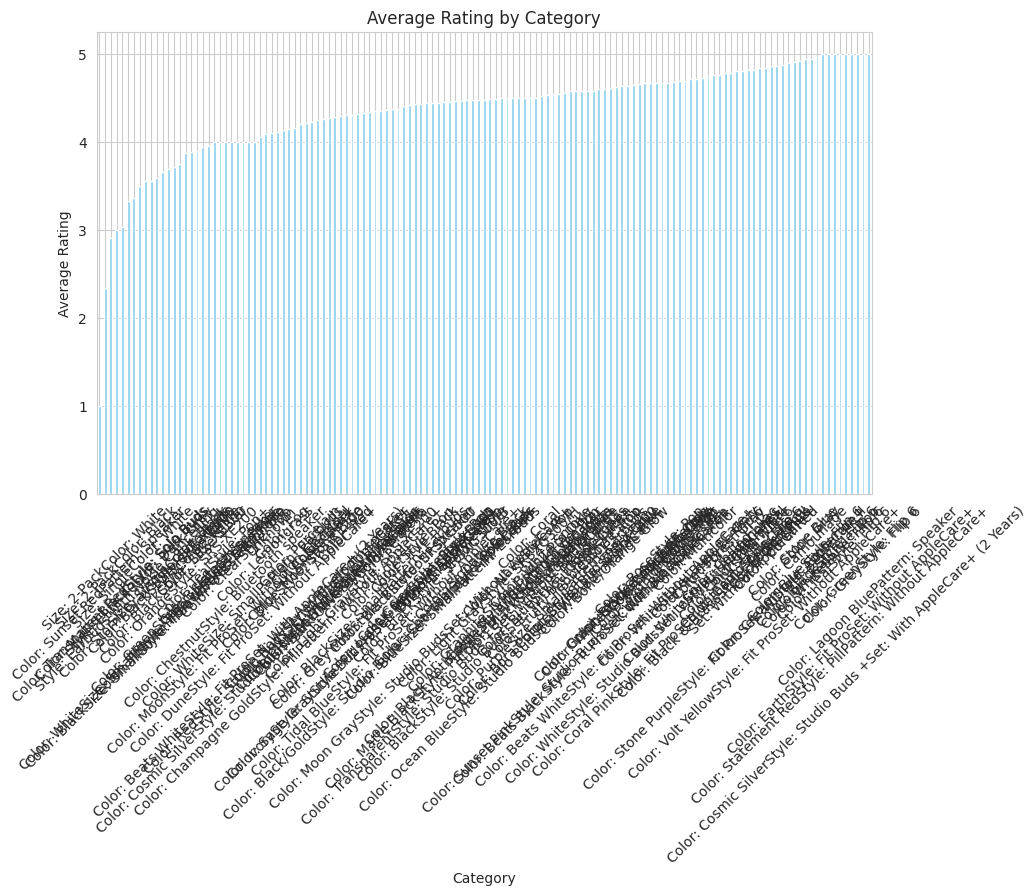

In [4]:
# Pair Plot
plt.figure(figsize=(10, 10))
sns.pairplot(df[['rating', 'helpful_count']], diag_kind='kde')
plt.suptitle('Pair Plot of Ratings, Helpful Count, and Another Numeric Variable', size=16, y=1.02)
plt.show()

# Violin Plot for 'rating' across 'another_category_column'
plt.figure(figsize=(8, 6))
sns.violinplot(x='product_attributes', y='rating', data=df)
plt.title('Violin Plot of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

# Bar Chart comparing mean 'rating' across different 'categories'
category_means = df.groupby('product_attributes')['rating'].mean().sort_values()
plt.figure(figsize=(10, 6))
category_means.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


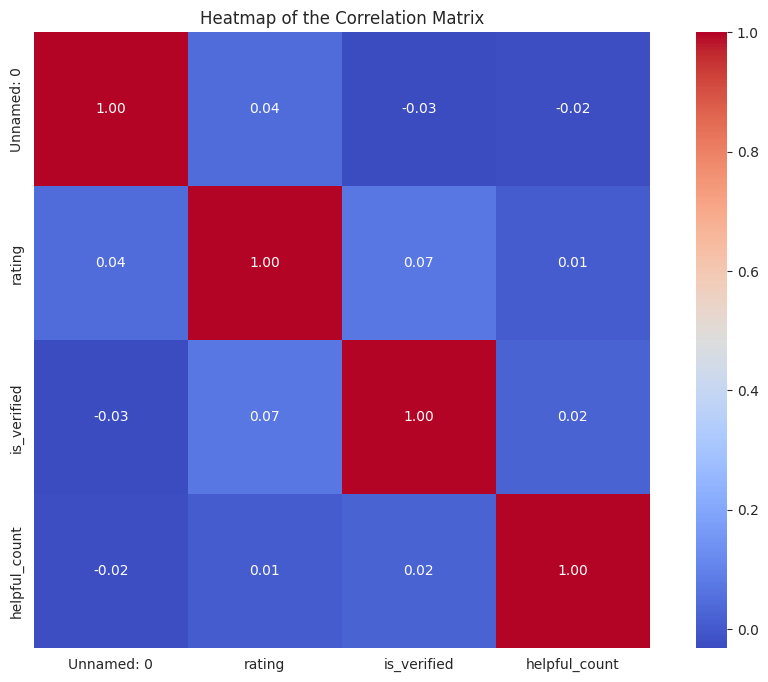

In [5]:
# Ensure only numerical columns are considered for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

Sentiment Summary:
sentiment_class
Positive    4378
Neutral      343
Negative     224
Name: count, dtype: int64


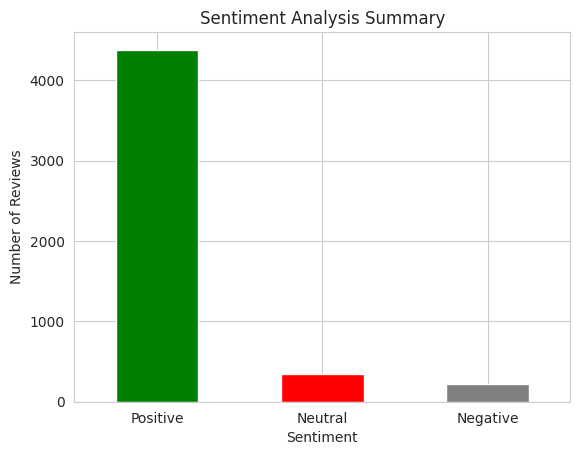

In [6]:
from textblob import TextBlob
import pandas as pd

# Function to apply sentiment analysis
def apply_sentiment_analysis(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

# Applying sentiment analysis to the 'content' column
df['sentiment'] = df['content'].apply(apply_sentiment_analysis)

# Extracting polarity and subjectivity
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity if x else None)
df['subjectivity'] = df['sentiment'].apply(lambda x: x.subjectivity if x else None)

# Classifying sentiments based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_class'] = df['polarity'].apply(classify_sentiment)

# Summary of sentiment analysis
sentiment_summary = df['sentiment_class'].value_counts()

# Display the summary of sentiments
print("Sentiment Summary:")
print(sentiment_summary)

# Visualizing the sentiment summary
import matplotlib.pyplot as plt

sentiment_summary.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis Summary')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


# Conclusion

## Summary of Findings
- **Data Quality and Preprocessing**: The data required some cleaning, including handling of missing values and removal of outliers. Categorical variables were encoded to facilitate further analysis.

- **Exploratory Data Analysis**: Visualizations revealed that the majority of reviews are positive, indicating a generally favorable customer response to the products. The histogram of ratings showed a left-skew, suggesting that customers are likely to rate products either very high or moderately.

- **Correlation Analysis**: The correlation analysis provided insights into the lack of strong relationships between variables such as 'rating' and 'helpful_count', which suggests that higher ratings do not necessarily correlate with the helpfulness of the reviews.

- **Sentiment Analysis**: The sentiment analysis demonstrated a predominant positive sentiment among the reviews. This is consistent with the high ratings observed and suggests that customers are generally satisfied with their purchases.

## Implications for Beats by Dre
- **Product Quality and Customer Satisfaction**: The positive sentiment and high ratings suggest that Beats by Dre is delivering products that meet or exceed customer expectations, which is crucial for maintaining brand loyalty and market position.

- **Marketing and Product Development**: The insights derived from the sentiment analysis and ratings can be leveraged to tailor marketing strategies that highlight the most appreciated features of the products. Furthermore, understanding areas where negative sentiments arise can guide product improvements.

- **Customer Engagement**: The analysis of review helpfulness can inform strategies to engage with customers more effectively. Encouraging more detailed reviews could enhance the value of customer feedback and foster a community around the brand.

## Recommendations
- **Enhance Customer Interaction**: Increase interaction with customers who leave reviews to strengthen relationships and encourage continued engagement. Offering incentives for detailed reviews might improve the quality and quantity of feedback.

- **Focus on Continuous Improvement**: Use detailed negative feedback from reviews to address any recurring issues. This proactive approach can help mitigate potential negative impacts on brand reputation.

- **Utilize Data-Driven Strategies**: Continue to use data analytics to understand customer needs and preferences. Regular sentiment analysis can help track changes in customer perception over time.

## Future Work
- **Further Statistical Analysis**: Additional analyses could include predictive modeling to forecast sales or customer satisfaction levels based on review data.
- **Longitudinal Study**: A longitudinal study to track customer sentiment and satisfaction over time could provide deeper insights into the impact of product changes or market dynamics.



**PART II: Function-Based**

In [7]:

def calculate_correlation(df, col1, col2):
    """
    Calculate the correlation coefficient between two columns in a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.
    col1 (str): The name of the first column.
    col2 (str): The name of the second column.

    Returns:
    float: The correlation coefficient.
    """
    if col1 in df.columns and col2 in df.columns:
        return df[col1].corr(df[col2])
    else:
        return None  # Return None if columns are not in DataFrame

In [8]:

def calculate_skewness_kurtosis(df, col):
    """
    Calculate the skewness and kurtosis of a column in a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.
    col (str): The name of the column.

    Returns:
    tuple: A tuple containing skewness and kurtosis.
    """
    if col in df.columns:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        return (skewness, kurtosis)
    else:
        return None

In [9]:
from textblob import TextBlob

def sentiment_analysis_summary(df, text_col):
    """
    Perform sentiment analysis on text data and return the counts of positive, negative, and neutral reviews.

    Parameters:
    df (DataFrame): The input DataFrame.
    text_col (str): The name of the column containing text data.

    Returns:
    dict: A dictionary with counts of positive, negative, and neutral reviews.
    """
    # Check if the text column exists in the DataFrame
    if text_col not in df.columns:
        return None  # Return None if column does not exist

    # Initialize counters for sentiment categories
    sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}

    # Analyze sentiment of each row in the text column
    for text in df[text_col].dropna():
        blob = TextBlob(text)
        if blob.sentiment.polarity > 0:
            sentiments['positive'] += 1
        elif blob.sentiment.polarity < 0:
            sentiments['negative'] += 1
        else:
            sentiments['neutral'] += 1

    return sentiments